In [ ]:
! pip install plantcv

In [ ]:
from plantcv import plantcv as pcv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from utils.tools import get_raster_data, read_geojson, show, save_raster_and_write_meta


In [ ]:
clipped_satellite_file = "clipped_satellite.tif"
imgA, _, _, _ = get_raster_data(clipped_satellite_file) 
imgA = np.transpose(imgA, (1, 2, 0))  # Convert from (bands, height, width) to (height, width, bands)

post_clipped_image = "post_clipped_image.tif"
imgB, _, _, _ = get_raster_data(post_clipped_image) 
imgB = np.transpose(imgB, (1, 2, 0))  # Convert from (bands, height, width) to (height, width, bands)

In [ ]:
%matplotlib widget
fig, ax = plt.subplots()
ax.imshow(imgA, cmap='gray')  

points = []
def onclick(event):
    if event.xdata is not None and event.ydata is not None:
        # Capture and print x, y coordinates
        x, y = event.xdata, event.ydata
        points.append((x, y))
        print(f'Point clicked: {x:.2f}, {y:.2f}')
        
        # Plot the point
        ax.plot(x, y, 'ro') # 'ro' for red circle
        fig.canvas.draw()

# Connect the click event
cid = fig.canvas.mpl_connect('button_press_event', onclick)
plt.show()

Click points on Image A


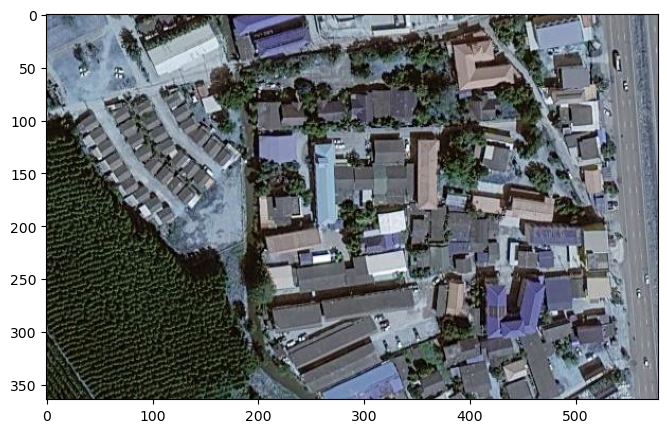

In [27]:
# --- Image A Point Selection ---
%matplotlib widget
print("Click points on Image A")
# Create an instance of the Points class and click on the plotted image
marker_A = pcv.Points(img=imgA, figsize=(10, 5))
# After clicking, the points are stored in marker_A.points 


In [28]:
points_A = marker_A.points
print(f"Points from Image A: {points_A}")

Points from Image A: [(100, 72), (331, 112), (361, 191), (251, 258), (380, 305)]


In [ ]:

# --- Image B Point Selection ---
print("Click points on Image B")
# Repeat for the second image
marker_B = pcv.Points(img=imgB, figsize=(10, 5))
# After clicking, the points are stored in marker_B.point

In [ ]:
# Retrieve the collected points
points_A = marker_A.points
points_B = marker_B.points

print(f"Points from Image A: {points_A}")
print(f"Points from Image B: {points_B}")